In [50]:
import pandas as pd
import zipfile 
from pandas.io.json import json_normalize
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed

In [2]:
zf = zipfile.ZipFile('/Users/andrewwalnum/Downloads/kc_house_data.csv.zip') # having First.csv zipped file.
df = pd.read_csv(zf.open(zipfile.ZipFile.namelist(zf)[0]))

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df['log_price'] = np.log(df.price)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,12.793859
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,12.899220
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,12.904459
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,12.899220


In [5]:
df.loc[df['yr_renovated'] == 0,'yr_renovated'] = np.nan
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,NaN,98178,47.5112,-122.257,1340,5650,12.309982
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,13.195614
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,12.100712
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000,13.311329
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,NaN,98103,47.6993,-122.346,1530,1509,12.793859
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,NaN,98146,47.5107,-122.362,1830,7200,12.899220
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,NaN,98144,47.5944,-122.299,1020,2007,12.904459
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,NaN,98027,47.5345,-122.069,1410,1287,12.899220


In [6]:
years = df.yr_renovated
decades = [] 
for each in years: 
    if not np.isnan(each): 
        decade = int(np.floor(each / 10) * 10) 
        decades.append(decade) 
    else: 
        decades.append(np.NaN)
        


### years = df.yr_renovated
decades = []
for each in years:
        if not np.isnan(each):
          decade = int(np.floor(each / 10) * 10)
          decades.append(decade)
        else:
            decades.append(np.NaN)

In [7]:
df['Decades'] = decades
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,Decades
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,NaN,98178,47.5112,-122.257,1340,5650,12.309982,NaN
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,13.195614,1990.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,NaN,98028,47.7379,-122.233,2720,8062,12.100712,NaN
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,NaN,98136,47.5208,-122.393,1360,5000,13.311329,NaN
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,NaN,98074,47.6168,-122.045,1800,7503,13.142166,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,NaN,98103,47.6993,-122.346,1530,1509,12.793859,NaN
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,NaN,98146,47.5107,-122.362,1830,7200,12.899220,NaN
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,NaN,98144,47.5944,-122.299,1020,2007,12.904459,NaN
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,NaN,98027,47.5345,-122.069,1410,1287,12.899220,NaN


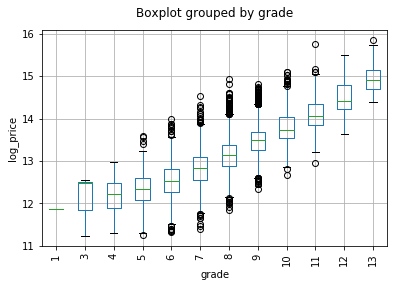

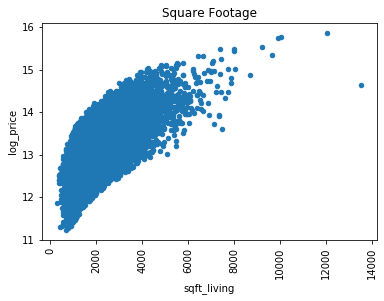

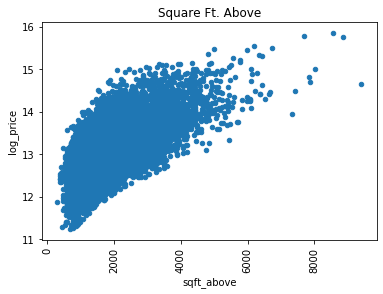

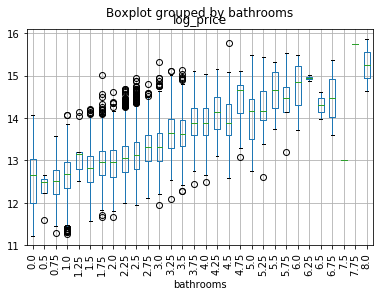

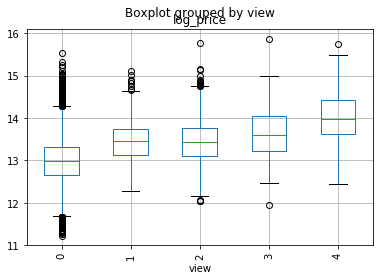

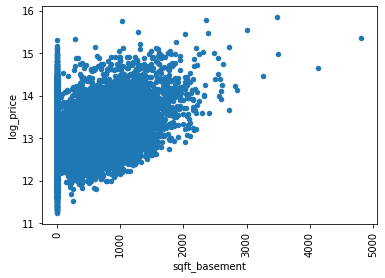

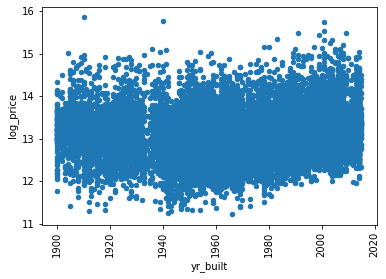

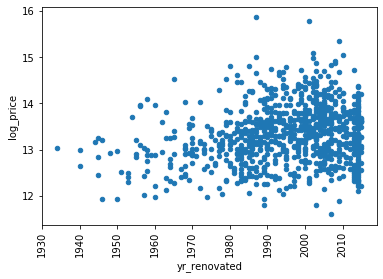

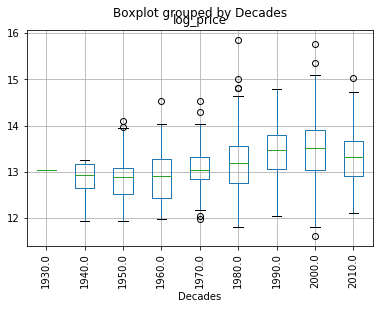

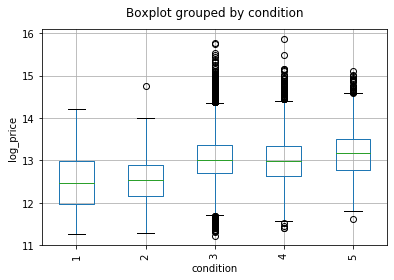

In [41]:
df.boxplot(column='log_price', by='grade', rot=90)
plt.title('', y=1.08)
plt.ylabel('log_price')
plt.show()
df.plot(kind='scatter', x='sqft_living', y='log_price', rot=90)
plt.title('Square Footage')
plt.show()
df.plot(kind='scatter', x='sqft_above', y='log_price', rot=90)
plt.title('Square Ft. Above')
plt.show()
df.boxplot(column='log_price', by='bathrooms', rot=90)
df.boxplot(column='log_price', by='view', rot=90)
df.plot(kind='scatter', x='sqft_basement', y='log_price', rot=90)
plt.show()
df.plot(kind='scatter', x='yr_built', y='log_price', rot=90)
plt.show()
df.plot(kind='scatter', x='yr_renovated', y='log_price', rot=90)
plt.show()
df.boxplot(column='log_price', by='Decades', rot=90)
plt.show()
df.boxplot(column='log_price', by='condition', rot=90)
plt.title('',y=1.08)
plt.ylabel('log_price')
plt.show()

In [9]:
# The above graphs show the strongest correlation between a variable and the price of the home.
# Using these variables, I can create a multiple regression that can help predict the price of a home

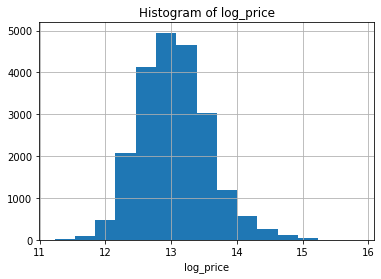

AttributeError: 'DataFrame' object has no attribute 'price'

In [46]:
df.log_price.hist(bins=15)

plt.xlabel('log_price')
plt.title('Histogram of log_price')
plt.show()

df.price.hist(bins=15)

plt.xlabel('Price')
plt.title('Histogram of Price')
plt.show()



In [34]:
time_series = df.loc[:, ('yr_built',('log_price'))]

Text(0.5, 1.0, 'Time Series of Year Built Vs. Log Price')

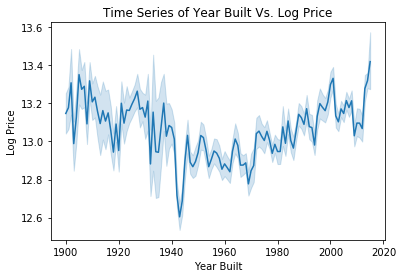

In [39]:
sns.lineplot(x="yr_built", y="log_price",
             data=df)
plt.xlabel('Year Built')
plt.ylabel('Log Price')
plt.title('Time Series of Year Built Vs. Log Price')

In [11]:
#The above histogram shows distribution of housing price.

In [43]:

df1 = df.pop('price')
df1 = df.pop('id')


KeyError: 'price'

In [44]:
df1 = df.pop('yr_renovated')

Text(0.5, 1, 'Correlated Heatmap')

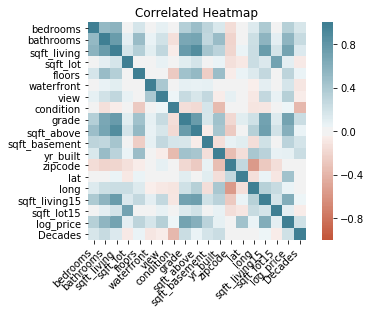

In [45]:
# heat map
import seaborn as sns
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title('Correlated Heatmap')

In [14]:
df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=20,figsize=(20,20),xlabelsize='10',ylabelsize='10',xrot=0)

[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

KeyError: "['price'] not in index"

In [ ]:
sns.heatmap(df.corr())